In [1]:
import random
from functions import solve_fjs_with_parallel_machines
from functions import generate_random_instance
from functions import plot_gantt
from functions import SchedulingProblem
from functions import decode_schedule
from genetic import GeneticAlgorithm
from simulated_annealing import SimulatedAnnealing

Jobs: 15, Centers: {'C1': 3, 'C2': 2, 'C3': 2, 'C4': 2}
Objective Σ wj·Tj = 0.0



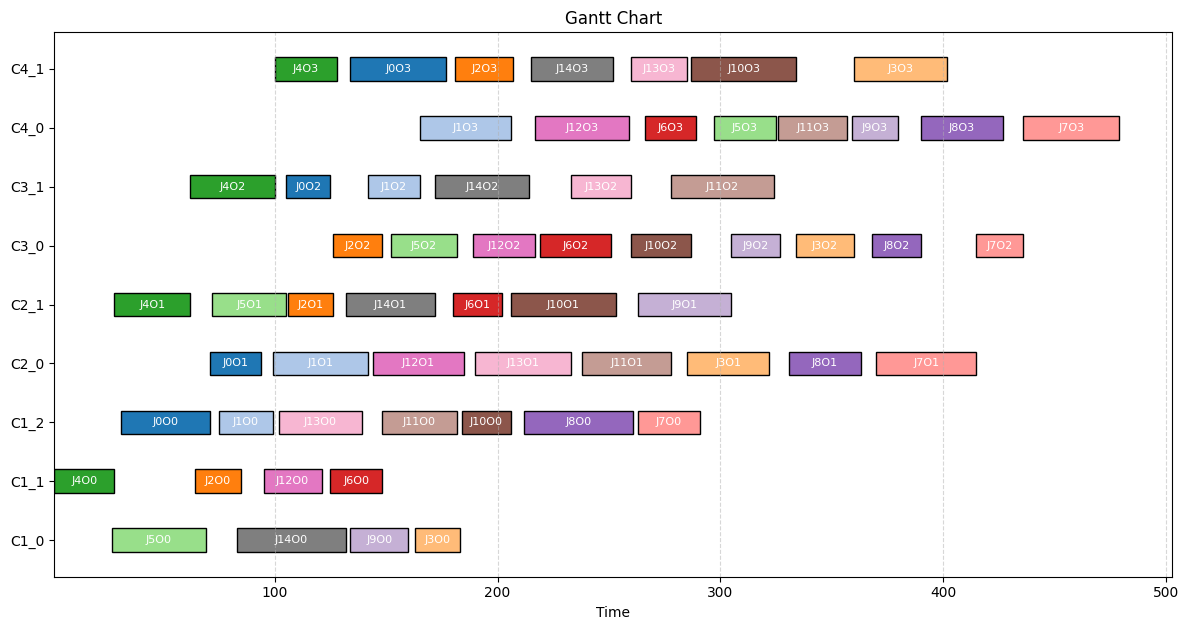

In [2]:
# 1. 生成隨機實例
random.seed(42)
jobs_data, release_dates, due_dates, weights, setup_times, center_caps = generate_random_instance()

# 2. 求解
schedule, obj = solve_fjs_with_parallel_machines(
    jobs_data, release_dates, due_dates, weights, setup_times, center_caps
)

# 3. 輸出結果
print(f"Jobs: {len(jobs_data)}, Centers: {center_caps}")
print(f"Objective Σ wj·Tj = {obj}\n")
plot_gantt(schedule)

In [3]:
mach0, prio0 = {}, {}
for j, ops in schedule.items():
    for o, m, start, end in ops:
        mach0[(j,o)] = m
        prio0[(j,o)] = start

seed = (mach0, prio0)
problem = SchedulingProblem(jobs_data, release_dates, due_dates, weights, setup_times, center_caps)

0


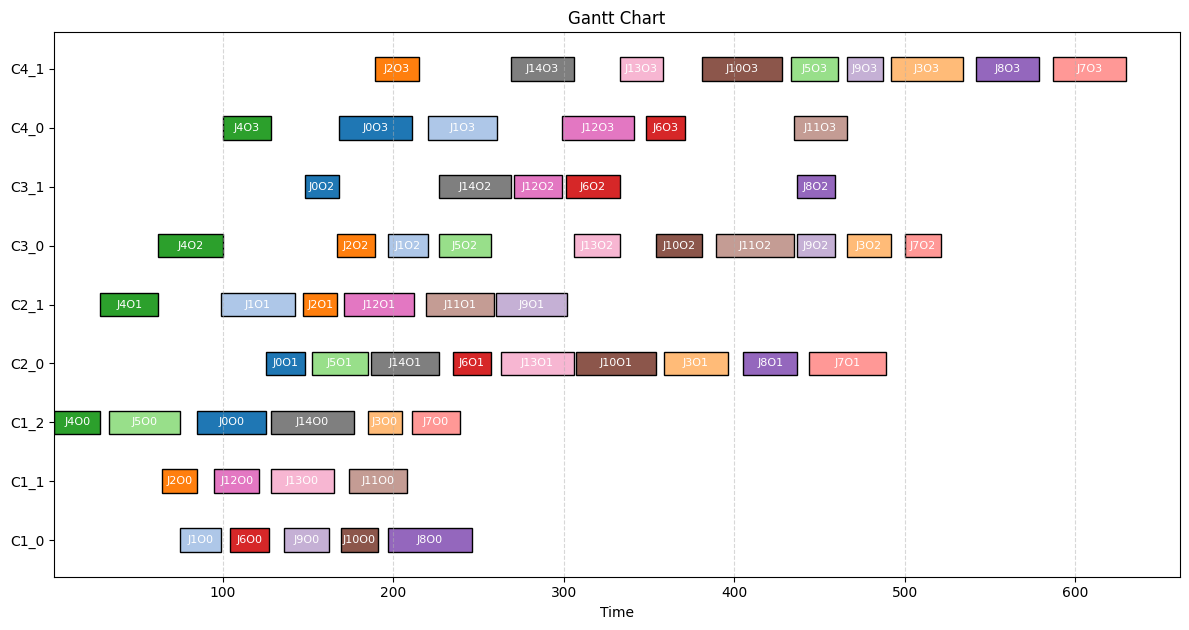

In [4]:
GA = GeneticAlgorithm(problem, pop_size = 100, max_generations = 50)
best_obj, best_schedule = GA.run(seed)
print(best_obj)

best_schedule = decode_schedule(jobs_data,
                    release_dates,
                    setup_times,
                    best_schedule[0],
                    best_schedule[1])

plot_gantt(best_schedule)

0


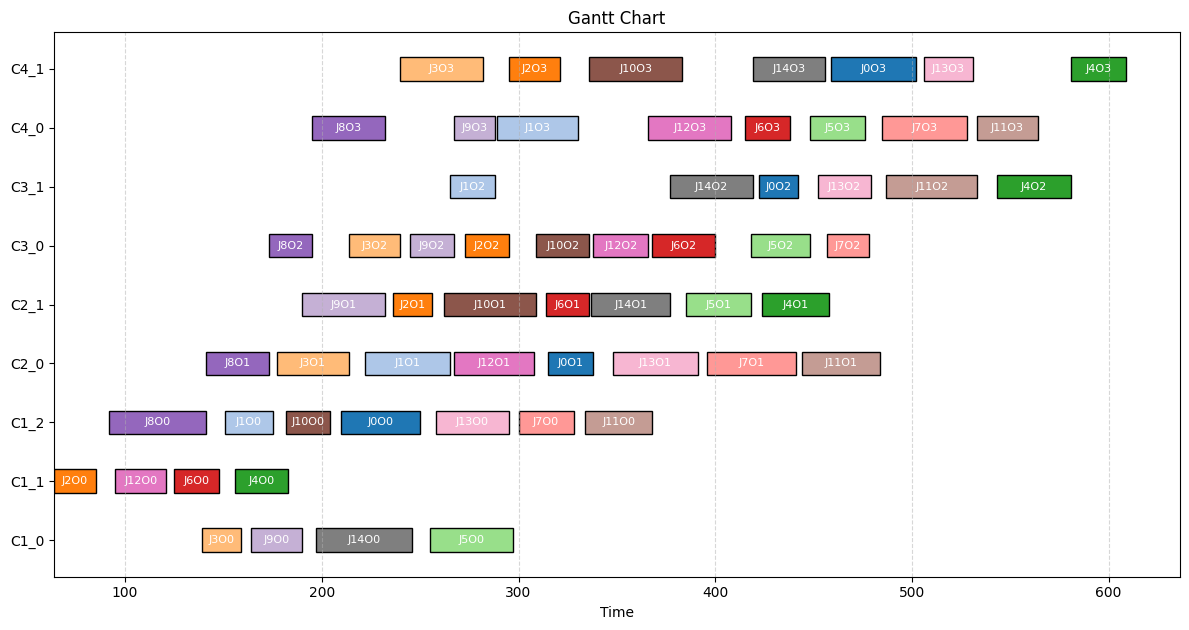

In [5]:
SA = SimulatedAnnealing(problem)
best_obj, best_schedule = SA.run(seed)
print(best_obj)

best_schedule = decode_schedule(jobs_data,
                    release_dates,
                    setup_times,
                    best_schedule[0],
                    best_schedule[1])

plot_gantt(best_schedule)